# Part II - Factors that Influences the ProsperLoans' LoanOriginalAmount
## by John Ametepe Agboku

## Investigation Overview

> Investigating the ProsperLoan dataset, i wanted to look at the factors that influences or determines the ProsperLoan LoanOriginalAmount. The main focus was on the BorrowerRate and the MonthlyLoanPayment.
>
> But it turns out that though the MonthlyLoanPayment explains approximately 92 percent of the variability in the LoanOriginalAmount i.e. the MonthlyLoanPayment has a strong influence in determining the LoanOriginalAmount, the BorrowerRate only influences the LoanOriginalAmount with an estimate of 41 percent which was unexpected because BorrowerRate was expected to have a strong relationship as MonthlyLoanPayment.
>
> This led into including Term of the Loan, ProsperRating (Alpha), ProsperScore, IsBorrowerHomeowner, and IncomeRange into our main focus.

## Dataset Overview

> The data contains 113,937 loan data with 81 features.
> 14 features were selected and investigated but only 8 features were thoroughly investigated.
 > The loans data before July 2009 were removed because the features selected because some of the selected features do not have those data and to make the analysis unbiased they were removed.
 > The 14 features selected and investigated are:
1. LoanOriginationDate
2. Term
3. BorrowerRate
4. LoanOriginalAmount
5. IncomeRange
6. CurrentDelinquencies
7. DelinquenciesLast7years
8. ProsperRating (Alpha)
9. Occupation
10. EmploymentStatus
11. IsBorrowerHomeowner
12. MonthlyLoanPayment
13. LoanStatus
14. ProsperScore

Which was later trimmed down to these 8 features
1. Term
2. BorrowerRate
3. LoanOriginalAmount
4. IncomeRange
5. ProsperRating (Alpha)
6. IsBorrowerHomeowner
7. MonthlyLoanPayment
8. ProsperScore

In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [44]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [45]:
#stripping the data set down to only the features of interest
columns_to_keep = ["IsBorrowerHomeowner","Term","BorrowerRate","LoanOriginationDate", "IncomeRange","CurrentDelinquencies","DelinquenciesLast7Years","ProsperRating (Alpha)","Occupation","EmploymentStatus","MonthlyLoanPayment","LoanStatus","ProsperScore","LoanOriginalAmount"]

loans = loans[columns_to_keep]

## Data Wrangling

In [46]:
#convert Term, IncomeRange, ProsperRating (Alpha) and ProsperScore into categorical data types

#convert prosperRating(Alpha) into ordered categorical types using ProsperRatingNumeric
rating = ["N/A","HR","E","D","C","B","A","AA"]
ordered_rating = pd.api.types.CategoricalDtype(ordered=True,
                                               categories=rating)
loans["ProsperRating (Alpha)"] = loans["ProsperRating (Alpha)"].astype(ordered_rating)

#Converting term into categorical data type
loans['Term'] = loans['Term'].astype(pd.CategoricalDtype(ordered=True))

#converting the IncomeRange into ordered categorical dtypes
range_list = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_range = pd.api.types.CategoricalDtype(ordered=True, categories=range_list)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_range)

#converting ProsperScore into categorical datatype
loans['ProsperScore'] = loans['ProsperScore'].astype(pd.CategoricalDtype(ordered=True))

#convert LoanOriginationDate into Datetime variable type
loans["LoanOriginationDate"] = loans["LoanOriginationDate"].astype(np.Datetime64)

In [47]:
#the dataframe with loans that originated after july 2009
loans = loans[~loans['ProsperScore'].isna() & ~loans['ProsperRating (Alpha)'].isna()]
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IsBorrowerHomeowner      84853 non-null  bool          
 1   Term                     84853 non-null  category      
 2   BorrowerRate             84853 non-null  float64       
 3   LoanOriginationDate      84853 non-null  datetime64[ns]
 4   IncomeRange              84853 non-null  category      
 5   CurrentDelinquencies     84853 non-null  float64       
 6   DelinquenciesLast7Years  84853 non-null  float64       
 7   ProsperRating (Alpha)    84853 non-null  category      
 8   Occupation               83520 non-null  object        
 9   EmploymentStatus         84853 non-null  object        
 10  MonthlyLoanPayment       84853 non-null  float64       
 11  LoanStatus               84853 non-null  object        
 12  ProsperScore             84853 

In [48]:
loans.describe()

,BorrowerRate,CurrentDelinquencies,DelinquenciesLast7Years,MonthlyLoanPayment,LoanOriginalAmount
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,0.196022,0.322452,3.659435,291.930720,9083.440515
std,0.074631,1.111996,9.347957,186.678314,6287.860058
min,0.040000,0.000000,0.000000,0.000000,1000.000000
25%,0.135900,0.000000,0.000000,157.330000,4000.000000
50%,0.187500,0.000000,0.000000,251.940000,7500.000000
75%,0.257400,0.000000,2.000000,388.350000,13500.000000
max,0.360000,51.000000,99.000000,2251.510000,35000.000000


## Distribution of LoanOriginalAmount

> The LoanOriginalAmount has values that ranges from 1,000 to 35,000. Using a log transformation to plot a histogram shows that most of the loans are concentrated around 5,000.

In [49]:
#function to plot histogram

def plot_hist(column, bins):
    plt.figure(figsize=[8,5])
    plt.hist(data=loans, x=column, bins = bins)
    plt.xlabel(column)

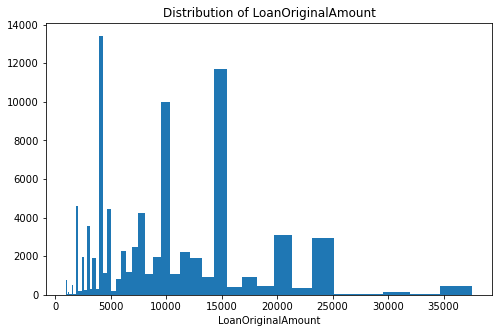

In [67]:
log_binsize = 0.035
bins = 10 ** np.arange(3, np.log10(loans.LoanOriginalAmount.max())+log_binsize, log_binsize)
plot_hist("LoanOriginalAmount",bins)
plt.title("Distribution of LoanOriginalAmount");


## Timeseries chart of LoanOriginalAmount
The timeseries graph shows that the LoanOriginalAmount per month increased steadily until the latter months of 2012 where there was a fall which was followed by an increased spike throughout 2013 but fell sharply in the early months of 2014

In [51]:
#function to create timeseries plot

def plt_timeseries(column, ylabel ="", freq = 'M'):
    df = loans[['LoanOriginationDate', column]]
    df.set_index("LoanOriginationDate", inplace=True)
    df = df.groupby(pd.Grouper(freq=freq)).sum()
    df.plot()
    plt.ylabel(ylabel)

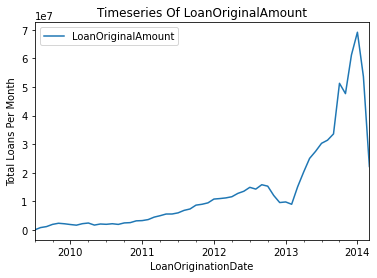

In [52]:
#timeseries plot of loanOriginalAmount over months
#creating new dataframe with only LoanOriginationDate and LoanOriginalAmount
plt_timeseries("LoanOriginalAmount","Total Loans Per Month")
plt.title('Timeseries Of LoanOriginalAmount');

## The Relationship between LoanOriginalAmount, MonthlyPayment and BorrowerRate

The MonthlyLoanPayment increases as the LoanOriginalAmount also increases, and it can be seen that the low BorrowerRates are concentrated on the upper left side which shows Loans with smaller MonthlyLoanPayment. As the LoanOriginalAmount gets larger, the BorrowerRate can be seen becoming dimmer, i.e. smaller but with the MonthlyPayment increasing.Which means, loans with larger amount have higher  MonthlyLoanPayment with smaller BorrowerRate as compared to loans with moderate to small LoanOriginalAmount that has smaller MonthlyLoanPayment but larger BorrowerRate But as the MonthlyLoanPayment increases, the BorrowerRate decreases.

In summary, As the LoanOriginalAmount increases, the MonthlyLoanPayment alos increases but the BorrowerRate decreases

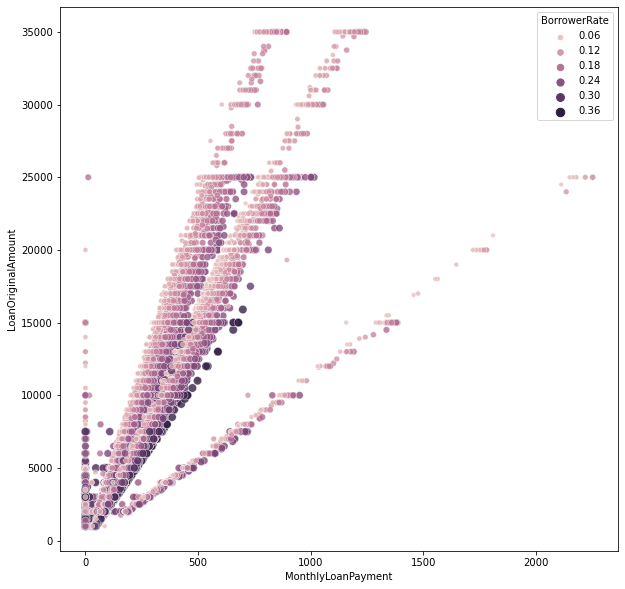

In [53]:
#The scatterplot of Loan
plt.figure(figsize=[10,10])
sb.scatterplot(data=loans, x='MonthlyLoanPayment',y='LoanOriginalAmount',hue="BorrowerRate",size='BorrowerRate',alpha=0.8);

## The Relationship between LoanOriginalAmount, BorrowerRate and Term i.e. (Term of the Loan)

The relationship between these variables shows that for loans with 36-month term are either huge LoanOriginalAmount with lower rates   or small with higher rates. And Loans with 60-month Term are concentrated on the upper right of the chart. Showing Loans with rates above 0.1 and LoanOriginalAmount approximately 7000 have longer have 60-month term.

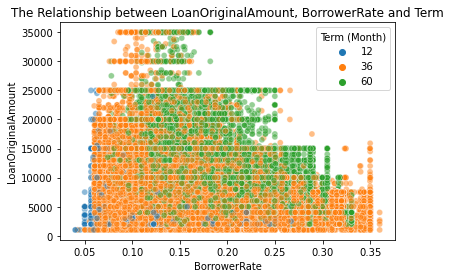

In [54]:
#plotting a scatterplot of LoanOriginalAmount, BorrowerRate and Term
sb.scatterplot(data=loans, x = "BorrowerRate", y="LoanOriginalAmount", hue="Term", alpha=0.5)
plt.legend(loc = 1, title = "Term (Month)");
plt.title("The Relationship between LoanOriginalAmount, BorrowerRate and Term");

## The Relationship between LoanOriginalAmount, MonthlyLoanPayment and ProsperRating (Alpha)

The loans with the best ProsperRating (Alpha) have lower BorrowerRate and the loans with the worst rating have high BorrowerRate

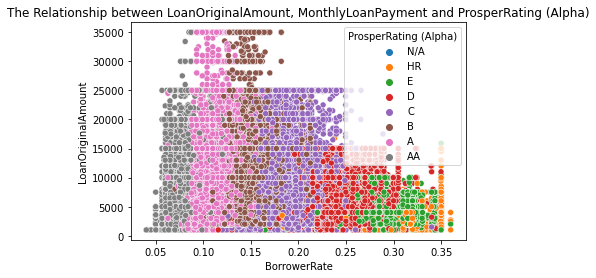

In [55]:
#plotting a scatterplot of LoanOriginalAmount, BorrowerRate and ProsperRating (Alpha)
sb.scatterplot(data=loans, x = "BorrowerRate", y="LoanOriginalAmount", hue="ProsperRating (Alpha)")
plt.legend(loc = 1, title = "ProsperRating (Alpha)");
plt.title("The Relationship between LoanOriginalAmount, MonthlyLoanPayment and ProsperRating (Alpha)");

## The Relationship between LoanOriginalAmount, MonthlyLoanPayment and ProsperRating (Alpha)

Just like the ProsperRating(Alpha), the lower BorrowerRate the better (Higher) the ProsperScore. 

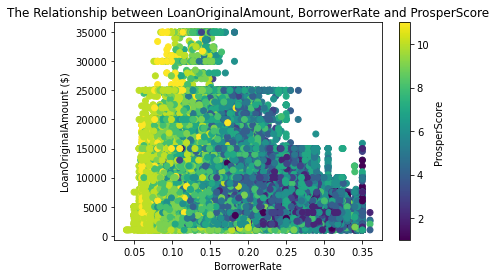

In [57]:
plt.scatter(data=loans, x = "BorrowerRate", y="LoanOriginalAmount", c="ProsperScore")
plt.colorbar(label='ProsperScore');
plt.title("The Relationship between LoanOriginalAmount, BorrowerRate and ProsperScore");
plt.xlabel('BorrowerRate')
plt.ylabel('LoanOriginalAmount ($)');

## The Relationship between LoanOriginalAmount, BorrowerRate and Term

The loan with longer Term rises faster the loans with short terms. From this it can be concluded that, the loans with longer Terms have smaller MonthlyLoanPayment as compared to loans with shorter term.

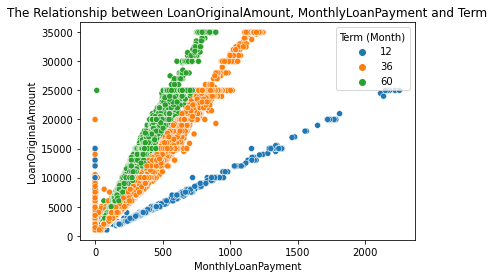

In [59]:
#plotting a scatterplot to show the relationship between LoanOriginalAmount, BorrowerRate and Term
sb.scatterplot(data=loans, x = "MonthlyLoanPayment", y="LoanOriginalAmount", hue="Term")
plt.legend(loc = 1, title = "Term (Month)")
plt.title("The Relationship between LoanOriginalAmount, MonthlyLoanPayment and Term");

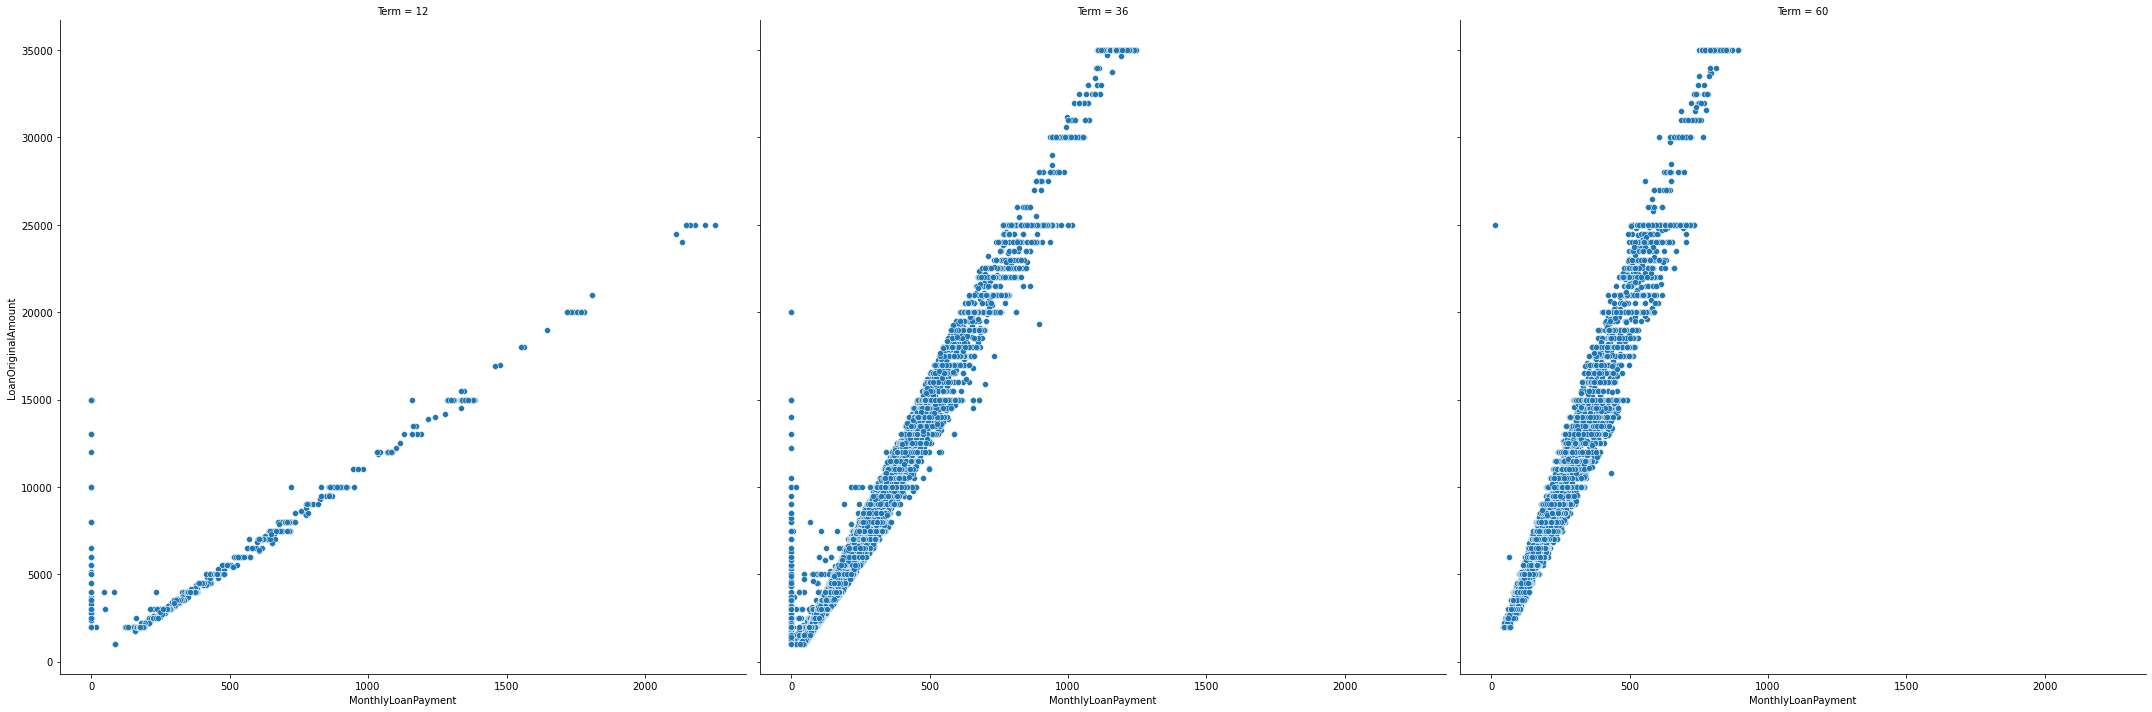

In [61]:
g = sb.FacetGrid(data=loans, col='Term',height=10 )
g.map(sb.scatterplot,'MonthlyLoanPayment' ,'LoanOriginalAmount');


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [69]:
!jupyter nbconvert Part_II_ProsperLoan_Explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_ProsperLoan_Explanatory.ipynb to slides
[NbConvertApp] Writing 1432331 bytes to Part_II_ProsperLoan_Explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\johna\anaconda3\anaconda31\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\johna\anaconda3\anaconda31\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\johna\anaconda3\anaconda31\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\johna\anaconda3\anaconda31\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\johna\anaconda3\anaconda31\lib\site-packages\nbconvert\nbconvertapp.py", line 541,

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 